## Install Libraries

Run the following cell to install the surprise library for running certain Matrix Factorization algorithms.

In [ ]:
# SVD
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163754 sha256=759939417c5c7a50d6a41ebdde73ab8c94f3331143bfafbb5dc737d8a1501d84
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


## Run code

First, download the (small) MovieLens dataset from here: https://files.grouplens.org/datasets/movielens/ml-latest-small.zip

Then, unzip and upload the `ratings.csv` file to the current directory on Colab.

Finally, you are ready to run the following cells in order.

In [ ]:
import pandas as pd
import numpy as np
import time

from surprise import Reader, Dataset, SVD, NMF
from surprise.model_selection import cross_validate

In [ ]:
ratings = pd.read_csv('ratings.csv')

In [ ]:
ratings_dict = {'itemID': list(ratings.movieId),
                'userID': list(ratings.userId),
                'rating': list(ratings.rating)}
df = pd.DataFrame(ratings_dict)
# Create a reader to parse the file (dataframe). Columns must correspond to
# user id, item id, and ratings
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)

### PMF with learning rate = 0.005 and regularization = 0.02. Avg Training RMSE = 0.5670, Avg Testing RMSE = 0.9814 (numbers will be different each time you run it)

In [ ]:
# PMF (unbiased SVD)
algo = SVD(biased=False)
start_time = time.time()
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True, return_train_measures=True)
end_time = time.time()
print(f"{end_time - start_time} seconds")

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9837  0.9807  0.9740  0.9808  0.9879  0.9814  0.0045  
MAE (testset)     0.7578  0.7552  0.7478  0.7530  0.7593  0.7546  0.0041  
RMSE (trainset)   0.5634  0.5702  0.5661  0.5678  0.5675  0.5670  0.0022  
MAE (trainset)    0.4366  0.4423  0.4391  0.4410  0.4403  0.4398  0.0019  
Fit time          1.44    1.87    1.43    1.44    1.44    1.52    0.17    
Test time         0.23    0.29    0.10    0.10    0.10    0.17    0.08    
13.772587537765503 seconds


### PMF with learning rate = 0.05 and regularization = 0.02. Avg Training RMSE = 0.1875, Avg Testing RMSE = 0.9541 (numbers will be different each time you run it)

In [ ]:
# PMF w/ tweaked learning rate
algo = SVD(biased=False, lr_all=0.05)
start_time = time.time()
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True, return_train_measures=True)
end_time = time.time()
print(f"{end_time - start_time} seconds")

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9593  0.9520  0.9474  0.9544  0.9573  0.9541  0.0042  
MAE (testset)     0.7432  0.7366  0.7346  0.7376  0.7369  0.7378  0.0029  
RMSE (trainset)   0.1928  0.1850  0.1876  0.1877  0.1843  0.1875  0.0030  
MAE (trainset)    0.1407  0.1354  0.1371  0.1365  0.1341  0.1368  0.0022  
Fit time          1.45    1.43    1.44    1.47    2.13    1.58    0.28    
Test time         0.29    0.11    0.10    0.11    0.11    0.14    0.07    
13.842092514038086 seconds


### PMF with learning rate = 0.05 and regularization = 0.1. Avg Training RMSE = 0.5196, Avg Testing RMSE = 0.9208 (numbers will be different each time you run it)

In [ ]:
# PMF w/ tweaked learning rate
algo = SVD(biased=False, lr_all=0.05, reg_all=0.1)
start_time = time.time()
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True, return_train_measures=True)
end_time = time.time()
print(f"{end_time - start_time} seconds")

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9218  0.9223  0.9244  0.9142  0.9213  0.9208  0.0035  
MAE (testset)     0.7165  0.7168  0.7217  0.7110  0.7148  0.7161  0.0035  
RMSE (trainset)   0.5213  0.5177  0.5205  0.5199  0.5186  0.5196  0.0013  
MAE (trainset)    0.3994  0.3971  0.3991  0.3985  0.3969  0.3982  0.0010  
Fit time          1.45    2.11    1.44    1.43    1.44    1.57    0.27    
Test time         0.12    0.19    0.11    0.13    0.12    0.14    0.03    
13.731465816497803 seconds


### PMF with learning rate = 0.01 and regularization = 0.2. Avg Training RMSE = 0.8339, Avg Testing RMSE = 0.9576 (numbers will be different each time you run it)

In [ ]:
# PMF w/ tweaked learning rate
algo = SVD(biased=False, lr_all=0.01, reg_all=0.2)
start_time = time.time()
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True, return_train_measures=True)
end_time = time.time()
print(f"{end_time - start_time} seconds")

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9566  0.9574  0.9614  0.9563  0.9561  0.9576  0.0020  
MAE (testset)     0.7430  0.7441  0.7446  0.7446  0.7460  0.7445  0.0010  
RMSE (trainset)   0.8335  0.8327  0.8322  0.8330  0.8380  0.8339  0.0021  
MAE (trainset)    0.6617  0.6611  0.6610  0.6620  0.6666  0.6625  0.0021  
Fit time          1.44    2.13    1.44    1.44    1.45    1.58    0.28    
Test time         0.11    0.18    0.10    0.10    0.20    0.14    0.04    
13.510766506195068 seconds


### SVD with learning rate = 0.005 and regularization = 0.02. Avg Training RMSE = 0.6367, Avg Testing RMSE = 0.8736 (numbers will be different each time you run it)

In [ ]:
# SVD
algo = SVD()
start_time = time.time()
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True, return_train_measures=True)
end_time = time.time()
print(f"{end_time - start_time} seconds")

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8700  0.8748  0.8696  0.8831  0.8706  0.8736  0.0051  
MAE (testset)     0.6676  0.6712  0.6709  0.6775  0.6687  0.6712  0.0034  
RMSE (trainset)   0.6380  0.6348  0.6372  0.6376  0.6361  0.6367  0.0011  
MAE (trainset)    0.4956  0.4927  0.4950  0.4956  0.4940  0.4946  0.0011  
Fit time          1.45    2.04    1.44    1.43    1.45    1.56    0.24    
Test time         0.11    0.11    0.11    0.11    0.20    0.13    0.04    
13.919950723648071 seconds


### SVD with learning rate = 0.05 and regularization = 0.02. Avg Training RMSE = 0.1354, Avg Testing RMSE = 0.8822 (numbers will be different each time you run it)

In [ ]:
# SVD w/ tweaked learning rate
algo = SVD(lr_all=0.05)
start_time = time.time()
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True, return_train_measures=True)
end_time = time.time()
print(f"{end_time - start_time} seconds")

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8816  0.8831  0.8831  0.8797  0.8833  0.8822  0.0014  
MAE (testset)     0.6768  0.6775  0.6782  0.6732  0.6801  0.6772  0.0023  
RMSE (trainset)   0.1349  0.1355  0.1352  0.1355  0.1357  0.1354  0.0003  
MAE (trainset)    0.0987  0.0993  0.0990  0.0993  0.0987  0.0990  0.0003  
Fit time          1.66    1.65    1.43    1.44    1.46    1.53    0.10    
Test time         0.32    0.11    0.11    0.20    0.11    0.17    0.08    
14.106786966323853 seconds


### SVD with learning rate = 0.01 and regularization = 0.09. Avg Training RMSE = 0.6888, Avg Testing RMSE = 0.8604 (numbers will be different each time you run it)

In [ ]:
# SVD w/ tweaked learning rate
algo = SVD(lr_all=0.01, reg_all=0.09)
start_time = time.time()
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True, return_train_measures=True)
end_time = time.time()
print(f"{end_time - start_time} seconds")

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8599  0.8601  0.8633  0.8586  0.8600  0.8604  0.0016  
MAE (testset)     0.6603  0.6589  0.6634  0.6600  0.6618  0.6609  0.0016  
RMSE (trainset)   0.6872  0.6909  0.6881  0.6894  0.6884  0.6888  0.0013  
MAE (trainset)    0.5357  0.5386  0.5361  0.5370  0.5367  0.5368  0.0010  
Fit time          1.42    1.44    1.95    1.43    1.43    1.53    0.21    
Test time         0.11    0.13    0.19    0.11    0.13    0.14    0.03    
14.184867143630981 seconds


### SVD with learning rate = 0.01 and regularization = 1. Avg Training RMSE = 0.8681, Avg Testing RMSE = 0.9064 (numbers will be different each time you run it)

In [ ]:
# SVD w/ tweaked learning rate
algo = SVD(lr_all=0.01, reg_all=1)
start_time = time.time()
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True, return_train_measures=True)
end_time = time.time()
print(f"{end_time - start_time} seconds")

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9143  0.9084  0.9051  0.9060  0.8984  0.9064  0.0051  
MAE (testset)     0.7135  0.7084  0.7081  0.7055  0.6991  0.7069  0.0047  
RMSE (trainset)   0.8663  0.8683  0.8685  0.8692  0.8683  0.8681  0.0010  
MAE (trainset)    0.6770  0.6783  0.6778  0.6792  0.6784  0.6781  0.0007  
Fit time          2.10    1.45    1.45    1.45    1.47    1.58    0.26    
Test time         0.23    0.20    0.11    0.15    0.21    0.18    0.04    
14.332862615585327 seconds


### NMF with bias = False and number of factors = 15. Avg Training RMSE = 0.6064, Avg Testing RMSE = 0.9227 (numbers will be different each time you run it)

In [ ]:
# NMF
algo = NMF()
start_time = time.time()
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True, return_train_measures=True)
end_time = time.time()
print(f"{end_time - start_time} seconds")

Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9125  0.9230  0.9242  0.9194  0.9342  0.9227  0.0071  
MAE (testset)     0.7025  0.7069  0.7067  0.7036  0.7121  0.7064  0.0034  
RMSE (trainset)   0.6076  0.6073  0.6049  0.6080  0.6039  0.6064  0.0016  
MAE (trainset)    0.4401  0.4395  0.4376  0.4410  0.4371  0.4391  0.0015  
Fit time          3.26    2.55    2.57    3.70    2.58    2.93    0.47    
Test time         0.10    0.10    0.11    0.10    0.19    0.12    0.04    
20.052088737487793 seconds


### NMF with bias = True and number of factors = 15. Avg Training RMSE = 0.9629, Avg Testing RMSE = 1.0964 (numbers will be different each time you run it)

In [ ]:
# NMF
algo = NMF(biased=True)
start_time = time.time()
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True, return_train_measures=True)
end_time = time.time()
print(f"{end_time - start_time} seconds")

Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8727  0.8699  0.8848  1.2085  1.6462  1.0964  0.3036  
MAE (testset)     0.6680  0.6672  0.6765  0.8924  1.2814  0.8371  0.2382  
RMSE (trainset)   0.6855  0.6845  0.6830  1.1574  1.6040  0.9629  0.3692  
MAE (trainset)    0.5135  0.5128  0.5115  0.8469  1.2448  0.7259  0.2900  
Fit time          2.79    2.89    2.58    2.54    3.24    2.81    0.25    
Test time         0.19    0.11    0.12    0.14    0.11    0.14    0.03    
20.92823100090027 seconds


### NMF with bias = True and number of factors = 7. Avg Training RMSE = 0.8273, Avg Testing RMSE = 0.8775 (numbers will be different each time you run it)

In [ ]:
# NMF
algo = NMF(biased=True, n_factors=7, reg_pu=0.7, reg_qi=0.7, reg_bu=0.4, reg_bi=0.4)
start_time = time.time()
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True, return_train_measures=True)
end_time = time.time()
print(f"{end_time - start_time} seconds")

Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8794  0.8794  0.8730  0.8783  0.8776  0.8775  0.0024  
MAE (testset)     0.6774  0.6794  0.6737  0.6789  0.6784  0.6776  0.0021  
RMSE (trainset)   0.8269  0.8269  0.8282  0.8269  0.8276  0.8273  0.0005  
MAE (trainset)    0.6402  0.6393  0.6406  0.6392  0.6395  0.6397  0.0005  
Fit time          2.46    2.16    2.08    2.07    2.92    2.34    0.32    
Test time         0.20    0.11    0.11    0.12    0.20    0.15    0.04    
18.444416999816895 seconds


### NMF with bias = True and number of factors = 3. Avg Training RMSE = 0.8273, Avg Testing RMSE = 0.8777 (numbers will be different each time you run it)

In [ ]:
# NMF
algo = NMF(biased=True, n_factors=3, reg_pu=0.7, reg_qi=0.7, reg_bu=0.4, reg_bi=0.4)
start_time = time.time()
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True, return_train_measures=True)
end_time = time.time()
print(f"{end_time - start_time} seconds")

Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8762  0.8780  0.8753  0.8762  0.8828  0.8777  0.0027  
MAE (testset)     0.6753  0.6798  0.6741  0.6764  0.6817  0.6775  0.0029  
RMSE (trainset)   0.8280  0.8274  0.8285  0.8268  0.8259  0.8273  0.0009  
MAE (trainset)    0.6403  0.6391  0.6410  0.6393  0.6379  0.6395  0.0011  
Fit time          1.81    1.78    1.79    2.55    1.82    1.95    0.30    
Test time         0.12    0.14    0.11    0.19    0.11    0.13    0.03    
16.165567874908447 seconds


# FastAI Collaborative Filtering for Recommender Systems

Notebook is based on example provided with fastai library: https://github.com/fastai/fastbook/blob/master/08_collab.ipynb

In [ ]:
import pandas as pd
import numpy as np

from fastai.collab import *
from fastai.tabular.all import *
path = untar_data(URLs.ML_100k)

In [ ]:
ratings = pd.read_csv(path/'u.data', delimiter='\t', header=None,
                      names=['user','movie','rating','timestamp'])
ratings.head()

,user,movie,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [ ]:
movies = pd.read_csv(path/'u.item',  delimiter='|', encoding='latin-1',
                     usecols=(0,1), names=('movie','title'), header=None)
movies.head()

,movie,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [ ]:
ratings = ratings.merge(movies)
ratings.head()

,user,movie,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [ ]:
dls = CollabDataLoaders.from_df(ratings, item_name='title', bs=64)
dls.show_batch()

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


,user,title,rating
0,666,Heat (1995),3
1,592,Female Perversions (1996),3
2,315,Heathers (1989),4
3,1,Platoon (1986),4
4,889,Stand by Me (1986),4
5,795,Quiz Show (1994),4
6,286,"Professional, The (1994)",4
7,7,Being There (1979),5
8,159,Jungle2Jungle (1997),4
9,778,E.T. the Extra-Terrestrial (1982),1


In [ ]:
class CollabNN(Module):
    def __init__(self, user_sz, item_sz, y_range=(0,5.5), n_act=100):
        self.user_factors = Embedding(*user_sz)
        self.item_factors = Embedding(*item_sz)
        self.layers = nn.Sequential(
            nn.Linear(user_sz[1]+item_sz[1], n_act),
            nn.ReLU(),
            nn.Linear(n_act, 1))
        self.y_range = y_range

    def forward(self, x):
        embs = self.user_factors(x[:,0]),self.item_factors(x[:,1])
        x = self.layers(torch.cat(embs, dim=1))
        return sigmoid_range(x, *self.y_range)

In [ ]:
embs = get_emb_sz(dls)
model = CollabNN(*embs)

###For the NCF methods, we run 5 epochs for each setting of parameters and return the epoch with lowest absolute value between training loss and validation loss as the result.

### NCF method, Learning rate = 0.005, Pct_start = 0.25, best result: epoch = 2, training loss = 0.853, validation loss = 0.852  (numbers will be different each time you run it)

In [ ]:
learn = Learner(dls, model, loss_func=MSELossFlat())
learn.fit_one_cycle(5, 5e-3, wd=0.01)

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


epoch,train_loss,valid_loss,time
0,0.959390,0.930687,00:18
1,0.915055,0.875264,00:20
2,0.852867,0.851838,00:21
3,0.807633,0.845345,00:20
4,0.764977,0.847093,00:20


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
/usr

### NCF method, Learning rate = 0.01, Pct_start = 0.25, best result: epoch = 3, training loss = 0.842, validation loss = 0.845  (numbers will be different each time you run it)

In [ ]:
learn = collab_learner(dls, use_nn=True, y_range=(0, 5.5), layers=[100,50])
learn.fit_one_cycle(5, lr_max=0.01, wd=0.1)

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


epoch,train_loss,valid_loss,time
0,1.012090,0.953356,00:20
1,0.941826,0.914665,00:26
2,0.895828,0.882048,00:24
3,0.842142,0.845355,00:22
4,0.778227,0.844076,00:22


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
/usr

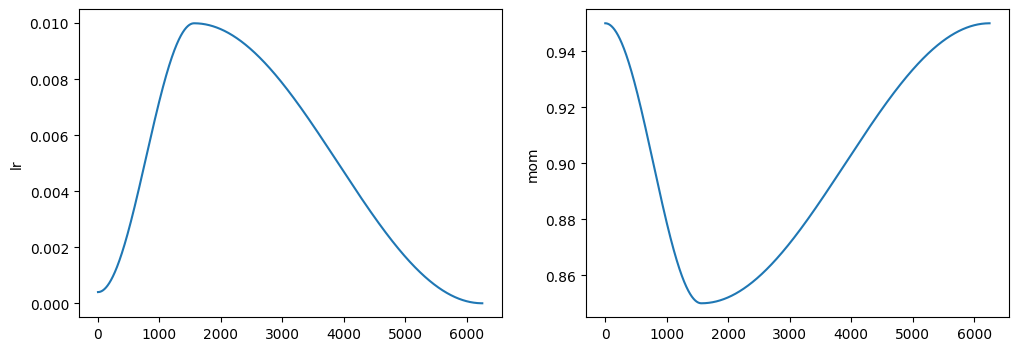

In [ ]:
learn.recorder.plot_sched()

### NCF method, Learning rate = 0.005, Pct_start = 0.5, best result: epoch = 3, training loss = 0.859, validation loss = 0.836  (numbers will be different each time you run it)

In [ ]:
learn = collab_learner(dls, use_nn=True, y_range=(0, 5.5), layers=[100,50])
learn.fit_one_cycle(5, 5e-3, wd=0.1, pct_start=0.5)

epoch,train_loss,valid_loss,time
0,0.980684,0.955526,00:23
1,0.974517,0.938862,00:23
2,0.924685,0.890251,00:22
3,0.858776,0.835838,00:22
4,0.781298,0.826959,00:22


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
/usr